<a href="https://colab.research.google.com/github/MuhammadMurtuzaZafar/AnimalApiTest/blob/main/LinearLegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [3]:
# # Mount your Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df = pd.read_csv("/content/drive/MyDrive/dataset/house_prices.csv")
df.shape

(187531, 21)

In [13]:
df.head()

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,...,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,NaN,NaN
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,...,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,NaN,NaN
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,...,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,NaN,NaN
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,...,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,...,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,NaN,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187531 entries, 0 to 187530
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Index              187531 non-null  int64  
 1   Title              187531 non-null  object 
 2   Description        184508 non-null  object 
 3   Amount(in rupees)  187531 non-null  object 
 4   Price (in rupees)  169866 non-null  float64
 5   location           187531 non-null  object 
 6   Carpet Area        106858 non-null  object 
 7   Status             186916 non-null  object 
 8   Floor              180454 non-null  object 
 9   Transaction        187448 non-null  object 
 10  Furnishing         184634 non-null  object 
 11  facing             117298 non-null  object 
 12  overlooking        106095 non-null  object 
 13  Society            77853 non-null   object 
 14  Bathroom           186703 non-null  object 
 15  Balcony            138596 non-null  object 
 16  Ca

In [57]:
selected_columns = df[['Price (in rupees)', 'Carpet Area']]
selected_columns.head()

,Price (in rupees),Carpet Area
0,6000.0,500 sqft
1,13799.0,473 sqft
2,17500.0,779 sqft
3,NaN,530 sqft
4,18824.0,635 sqft


In [59]:
selected_columns.isnull().sum()

# Handle missing values
# Dropping rows with missing values in either 'Price (in rupees)' or 'Carpet Area'
selected_columns = selected_columns.dropna(subset=['Price (in rupees)', 'Carpet Area'])

# Convert 'Carpet Area' to numeric if it isn't already
selected_columns['Carpet Area'] = selected_columns['Carpet Area'].astype(str).str.extract('(\d+)', expand=False)
# selected_columns['Carpet Area'] = pd.to_numeric(selected_columns['Carpet Area'], errors='coerce')

# selected_columns['Price (in rupees)'] = pd.to_numeric(selected_columns['Price (in rupees)'], errors='coerce')

# Recheck for any remaining NaNs after type conversion and drop them
selected_columns = selected_columns.dropna(subset=['Carpet Area', 'Price (in rupees)'])

# Display basic statistics
print(selected_columns.describe())

# Ensure there are no infinite values
selected_columns = selected_columns.replace([np.inf, -np.inf], np.nan).dropna()



       Price (in rupees)
count       9.363100e+04
mean        8.204824e+03
std         3.313686e+04
min         0.000000e+00
25%         4.600000e+03
50%         6.324000e+03
75%         1.050000e+04
max         6.700000e+06


In [60]:
selected_columns.head()

,Price (in rupees),Carpet Area
0,6000.0,500
1,13799.0,473
2,17500.0,779
4,18824.0,635
6,2538.0,550


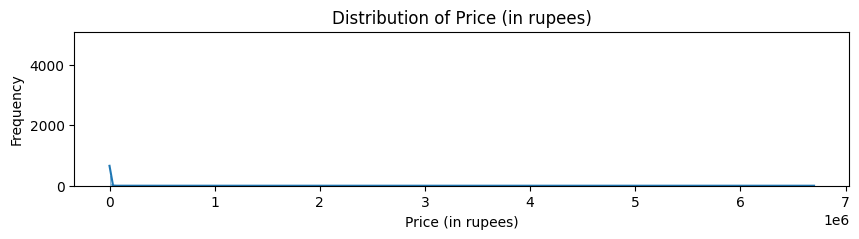

In [65]:
# Visualization
# Histogram of Price
plt.figure(figsize=(10, 2))
sns.histplot(selected_columns['Price (in rupees)'], kde=True)
plt.title('Distribution of Price (in rupees)')
plt.xlabel('Price (in rupees)')
plt.ylabel('Frequency')
plt.show()

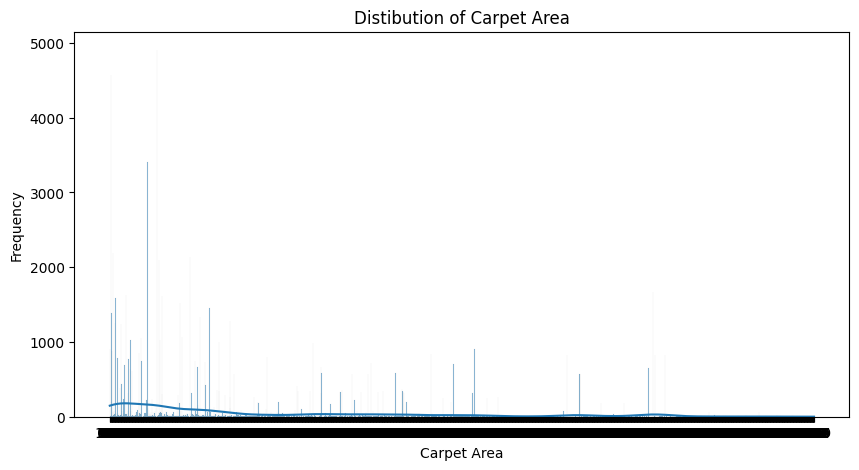

In [63]:
plt.figure(figsize=(10, 5))
sns.histplot(selected_columns['Carpet Area'],kde=True)
plt.title("Distibution of Carpet Area")
plt.xlabel("Carpet Area")
plt.ylabel("Frequency")
plt.show()
# Histogram of Carpet Area
# plt.figure(figsize=(10, 5))
# sns.histplot(selected_columns['Carpet Area'], kde=True)
# plt.title('Distribution of Carpet Area')
# plt.xlabel('Carpet Area')
# plt.ylabel('Frequency')
# plt.show()


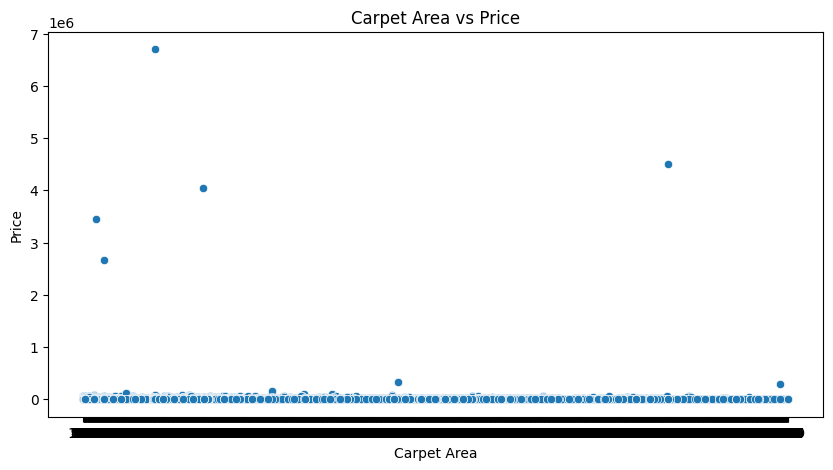

In [64]:
#scattered plot
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Carpet Area',y='Price (in rupees)', data=selected_columns,color='red',marker='+')
plt.title("Carpet Area vs Price")
plt.xlabel("Carpet Area")
plt.ylabel("Price")
plt.show()

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [68]:
# Split the data into training and testing sets
X = selected_columns[['Price (in rupees)', 'Carpet Area']]
y = selected_columns['Price (in rupees)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [70]:

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [71]:
# Predict on the test set
y_pred = model.predict(X_test)

In [72]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 4.417114958707549e-29
Root Mean Squared Error: 6.64613794523372e-15
Mean Absolute Error: 4.889023383982449e-17
R^2 Score: 1.0


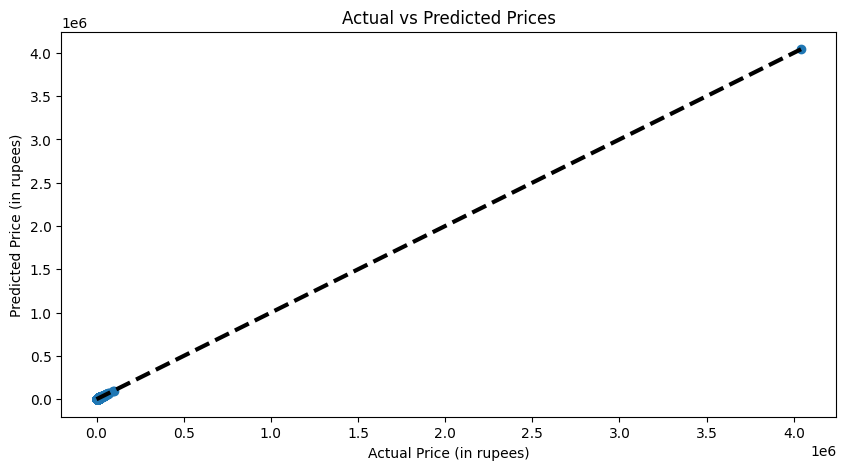

In [73]:
# Visualization of the predictions vs actual prices
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual Price (in rupees)')
plt.ylabel('Predicted Price (in rupees)')
plt.title('Actual vs Predicted Prices')
plt.show()